Для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом:
1. доля всех задержек ко всем вылетам
2. найти зависимость количества задержек от длины пути, который предстоит пролететь самолету
3. топ 5 направлений, для которых чаще всего происходят задержки
4. в какие времена года чаще всего происходят задержки рейсов
5. найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
6. найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [124]:
data = pd.read_csv('/Users/elizavetamenshchikova/Desktop/программирование/VAD/flight_delays.csv')
data1 = pd.read_csv('/Users/elizavetamenshchikova/Desktop/программирование/VAD/flight_delays.csv')

Доля всех задержек ко всем вылетам:

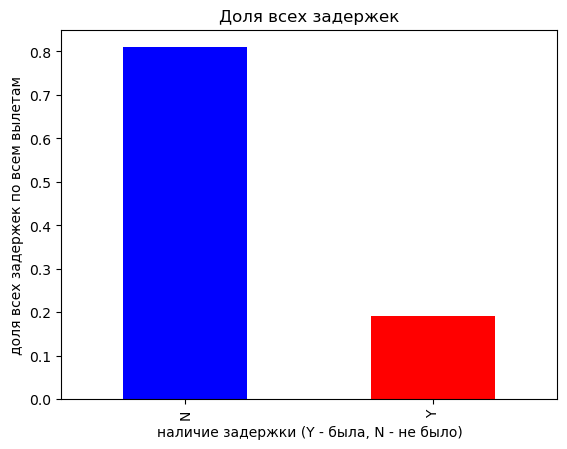

In [125]:
delay_ratio = data['dep_delayed_15min'].value_counts(normalize=True)

delay_ratio.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('наличие задержки (Y - была, N - не было)')
plt.ylabel('доля всех задержек по всем вылетам')
plt.title('Доля всех задержек')
plt.show()

Топ-5 направлений, для которых чаще всего происходят задержки

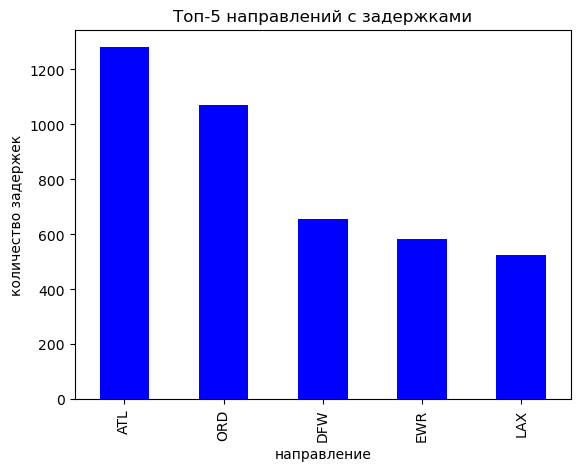

In [126]:
top_delayed_destinations = data[data['dep_delayed_15min'] == 'Y']['Dest'].value_counts().head(5)

top_delayed_destinations.plot(kind='bar', color='blue')
plt.xlabel('направление')
plt.ylabel('количество задержек')
plt.title('Топ-5 направлений с задержками')
plt.show()

В какие времена года чаще всего происходят задержки

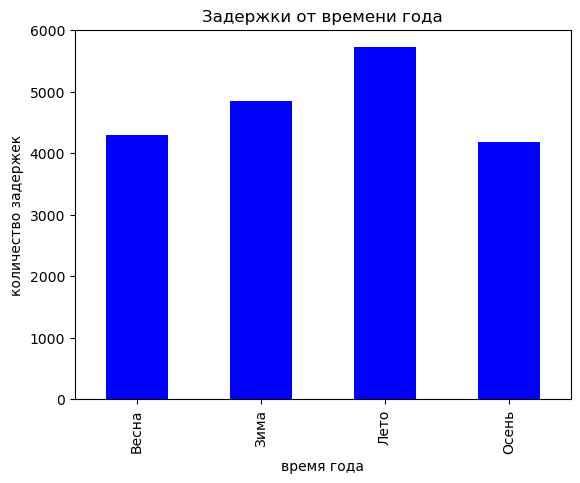

In [127]:
data1['dep_delayed_15min'] = data1['dep_delayed_15min'].map({'Y': 1, 'N': 0})

data1['Month'] = data1['Month'].map({'c-1': 1, 'c-2': 2, 'c-3': 3, 'c-4': 4, 'c-5': 5,'c-6': 6,
                                     'c-7': 7, 'c-8': 8, 'c-9': 9, 'c-10': 10, 'c-11': 11, 'c-12': 12})

data1['Season'] = data1['Month'].apply(lambda x: 'Зима' if x in [12, 1, 2]
                                      else 'Весна' if x in [3, 4, 5]
                                      else 'Лето' if x in [6, 7, 8]
                                      else 'Осень')

delay_by_season = data1.groupby('Season')['dep_delayed_15min'].sum()

delay_by_season.plot(kind='bar', color='blue')
plt.xlabel('время года')
plt.ylabel('количество задержек')
plt.title('Задержки от времени года')
plt.show()

Топ-10 лучших перевозчиков, которые реже всего задерживают рейсы

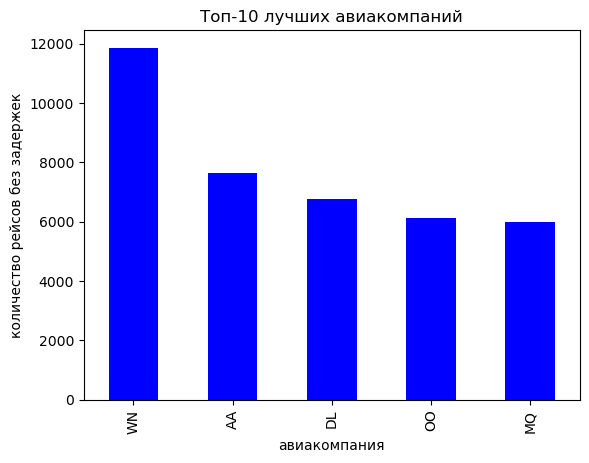

In [128]:
top_avia = data[data['dep_delayed_15min'] == 'N']['UniqueCarrier'].value_counts().head(5)

top_avia.plot(kind='bar', color='blue')
plt.xlabel('авиакомпания')
plt.ylabel('количество рейсов без задержек')
plt.title('Топ-10 лучших авиакомпаний')
plt.show()

Топ-10 худших аэропортов, в которых больше всего задержек

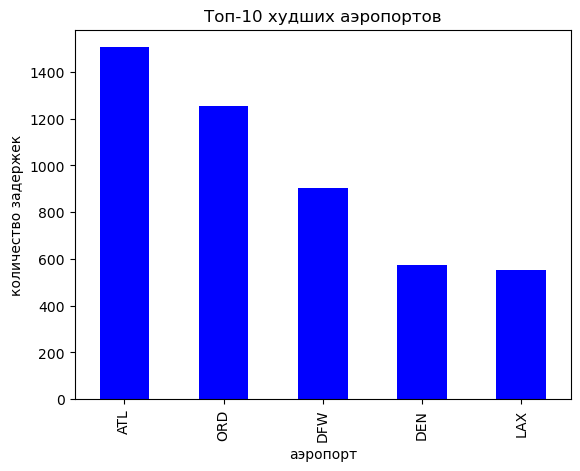

In [129]:
top_aero = data[data['dep_delayed_15min'] == 'Y']['Origin'].value_counts().head(5)

top_aero.plot(kind='bar', color='blue')
plt.xlabel('аэропорт')
plt.ylabel('количество задержек')
plt.title('Топ-10 худших аэропортов')
plt.show()

Зависимость количества задержек от длины пути, который предстоит пролететь самолету

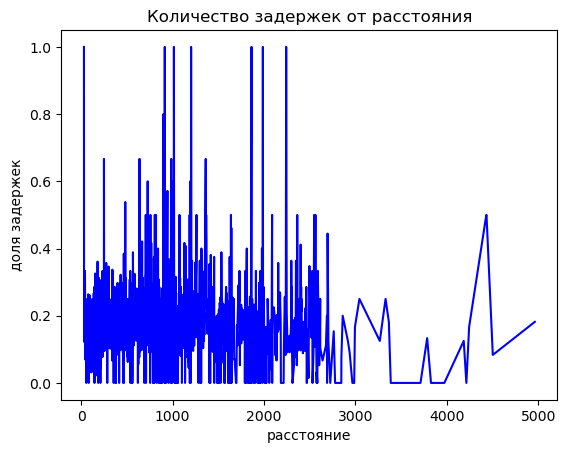

In [130]:
data['dep_delayed_15min'] = data['dep_delayed_15min'].map({'Y': 1, 'N': 0})

delay_vs_distance = data.groupby('Distance')['dep_delayed_15min'].mean()

plt.plot(delay_vs_distance.index, delay_vs_distance.values, color='blue')
plt.xlabel('расстояние')
plt.ylabel('доля задержек')
plt.title('Количество задержек от расстояния')
plt.show()